<a href="https://colab.research.google.com/github/mathsuser/Investment_Strategy_Backtesting/blob/main/real_returns_buy_n_hold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import numpy as np

# Introduction:

In this Notebook, we are going to assess the real returns on an index buy and hold strategy over a past period if time.

The index that we choose is the S&P500.

What are the input data that I needed to run the backtest for each security?



*   The ticker of the security
*   The backtesting window
*   The inflation ticker




In [194]:
def fetch_inflation_data(inflation_curve, start_date, end_date):
    # Fetch data from FRED (Federal Reserve Economic Data)
    url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=' + inflation_curve
    CPI_data = pd.read_csv(url, index_col=0, parse_dates=True)
    CPI_data = CPI_data.loc[start_date:end_date]
    CPI_data = CPI_data.reset_index()
    inflation_df = CPI_data.copy()
    inflation_df = inflation_df.reset_index(drop=True)

    return inflation_df



def fetch_historical_data(ticker, start_date, end_date):

    data = yf.download(ticker, start=start_date, end=end_date, actions=True)

    prices_df = pd.DataFrame({'Date': data.index, 'Price': data['Adj Close']})

    prices_df = prices_df.reset_index(drop=True)
    print(prices_df.head())
    return prices_df

def fetch_historical_dividends(ticker, start_date, end_date):

    data = yf.download(ticker, start=start_date, end=end_date, actions=True)


    dividends = data[data['Dividends']>0]

    dividends_df = pd.DataFrame({'Date': dividends.index, 'Dividend': dividends['Dividends']})

    df_dividends = dividends_df.reset_index(drop=True)
    if dividends.empty:
        print("No dividends found for the selected period.")
    return df_dividends


def merge_price_dividends(ticker, start_date, end_date):
    price_data = fetch_historical_data(ticker, start_date, end_date)
    dividends_data = fetch_historical_dividends(ticker, start_date, end_date)
    if dividends_data is None:
        dividends_data = pd.DataFrame(columns=['Date', 'Dividend'])

    # Merge prices and dividends dataframes on date
    merged_df = pd.merge(price_data, dividends_data, on='Date', how='left')

    # Fill missing dividends with 0, since not every day will have a dividend
    merged_df['Dividend'] = merged_df['Dividend'].fillna(0)



In [198]:
Size = 18 # The size of the backtesting window
end_date =date.today() - timedelta(days=1)
start_date = end_date.replace(year=end_date.year - Size)


print("Satrt date: ", start_date)
print("End date: ", end_date)

inflation_curve = 'CPIAUCSL'

Tickers = ['SPY', 'IAU', 'BTC-USD'] # 'SPY' corresponds to the S&P500 distributing index ETF and 'IAU' corresponds to the Index Physical Gold Trust ETF. Both quotes in the USD. The third ticker stands for Bitcoin.

Satrt date:  2006-09-28
End date:  2024-09-28


In [199]:
# Fetch the price data, the dividend data and the inflation data for the given look back window and the given tickers
prices_dfs = {}
dividends_dfs = {}

for ticker in Tickers:
    print()
    print(f"Fetching data for {ticker}...\n")
    prices_dfs[ticker] = fetch_historical_data(ticker, start_date, end_date)
    dividends_dfs[ticker] = fetch_historical_dividends(ticker, start_date, end_date)


inflation_df = fetch_inflation_data(inflation_curve, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SPY...

        Date      Price
0 2006-09-28  94.890396
1 2006-09-29  94.812332
2 2006-10-02  94.457451
3 2006-10-03  94.656189
4 2006-10-04  95.763443

Fetching data for IAU...




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


        Date   Price
0 2006-09-28  11.960
1 2006-09-29  11.904
2 2006-10-02  11.820
3 2006-10-03  11.430
4 2006-10-04  11.274
No dividends found for the selected period.

Fetching data for BTC-USD...

        Date       Price
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014
No dividends found for the selected period.


In [200]:
# Printing the first rows of the dfs

for ticker, prices_df in prices_dfs.items():
    print(f"Prices for {ticker}:")
    print(prices_df.head())

for ticker, dividends_df in dividends_dfs.items():
    print(f"Dividends for {ticker}:")
    print(dividends_df.head())


print("CPI :\n")
print(inflation_df.head())

Prices for SPY:
        Date      Price
0 2006-09-28  94.890396
1 2006-09-29  94.812332
2 2006-10-02  94.457451
3 2006-10-03  94.656189
4 2006-10-04  95.763443
Prices for IAU:
        Date   Price
0 2006-09-28  11.960
1 2006-09-29  11.904
2 2006-10-02  11.820
3 2006-10-03  11.430
4 2006-10-04  11.274
Prices for BTC-USD:
        Date       Price
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014
Dividends for SPY:
        Date  Dividend
0 2006-12-15     0.793
1 2007-03-16     0.551
2 2007-06-15     0.656
3 2007-09-21     0.719
4 2007-12-21     0.775
Dividends for IAU:
Empty DataFrame
Columns: [Date, Dividend]
Index: []
Dividends for BTC-USD:
Empty DataFrame
Columns: [Date, Dividend]
Index: []
CPI :

        DATE  CPIAUCSL
0 2006-10-01   201.900
1 2006-11-01   202.000
2 2006-12-01   203.100
3 2007-01-01   203.437
4 2007-02-01   204.226


In [201]:
Total_Returns_df = pd.DataFrame(columns =['Date'] + [f'{ticker}' for ticker in Tickers])
Total_Returns_df.head()
monthly_returns = pd.DataFrame(columns =[f'{ticker}' for ticker in Tickers])
monthly_returns.head()
for ticker in Tickers:
    prices_df = prices_dfs[ticker]
    dividends_df = dividends_dfs[ticker]
    merged_df = pd.merge(prices_df, dividends_df, on='Date', how='left')
    merged_df['Dividend'] = merged_df['Dividend'].fillna(0)
    Total_Returns_df['Date'] = merged_df['Date']
    Total_Returns_df[f'{ticker}'] = (merged_df['Price'] + merged_df['Dividend']) / merged_df['Price'].shift(1) - 1
    m_returns = (1 + Total_Returns_df.set_index('Date')[f'{ticker}']).resample('M').prod() - 1
    monthly_returns[f'{ticker}'] = m_returns



In [202]:
monthly_returns.head()

,SPY,IAU,BTC-USD
Date,,,
2006-09-30,-0.000823,-0.004682,NaN
2006-10-31,0.031517,0.010249,NaN
2006-11-30,0.019885,0.071345,NaN
2006-12-31,0.021281,-0.018162,NaN
2007-01-31,0.015041,0.025296,NaN


In [203]:

# Move the index to a column
df_reset = monthly_returns.reset_index()

# Optionally, rename the 'index' column to 'Date'
df_reset.rename(columns={'index': 'Date'}, inplace=True)

# Print the modified DataFrame
print(df_reset)
monthly_returns_df = df_reset.copy()

          Date       SPY       IAU   BTC-USD
0   2006-09-30 -0.000823 -0.004682       NaN
1   2006-10-31  0.031517  0.010249       NaN
2   2006-11-30  0.019885  0.071345       NaN
3   2006-12-31  0.021281 -0.018162       NaN
4   2007-01-31  0.015041  0.025296       NaN
..         ...       ...       ...       ...
212 2024-05-31  0.050580  0.015935  0.113043
213 2024-06-30  0.038635 -0.001364 -0.071315
214 2024-07-31  0.012109  0.053949  0.030967
215 2024-08-31  0.023366  0.021166 -0.087425
216 2024-09-30  0.020054  0.059433  0.115665

[217 rows x 4 columns]


In [204]:


# Assuming `returns_df` contains 'Date' and 'MonthlyReturn'
# and `inflation_df` contains 'DATE' and 'CPIAUCSL'

# Step 1: Merge the returns and inflation data on the 'Date' columns
monthly_returns_df['Date'] = pd.to_datetime(monthly_returns_df['Date'])
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])

# Resample CPI data to monthly frequency (if necessary)
inflation_df = inflation_df.set_index('DATE').resample('M').ffill().reset_index()

# Merge the two datasets
merged_df = pd.merge(inflation_df, monthly_returns_df, left_on='DATE', right_on='Date', how='inner')
merged_df = merged_df.drop('Date', axis=1)
# Step 2: Calculate the inflation rate (CPI growth between consecutive months)
merged_df['InflationRate'] = merged_df['CPIAUCSL'].pct_change()
merged_df = merged_df.dropna(subset=['InflationRate'])
monthly_data = merged_df.copy()
returns_df = merged_df.copy()

print(monthly_data.head())

        DATE  CPIAUCSL       SPY       IAU  BTC-USD  InflationRate
1 2006-11-30   202.000  0.019885  0.071345      NaN       0.000495
2 2006-12-31   203.100  0.021281 -0.018162      NaN       0.005446
3 2007-01-31   203.437  0.015041  0.025296      NaN       0.001659
4 2007-02-28   204.226 -0.019617  0.025135      NaN       0.003878
5 2007-03-31   205.288  0.017203 -0.009777      NaN       0.005200


In [205]:
# Step 3: Calculate real returns using the formula:
# R_real = (1 + R_nominal) / (1 + InflationRate) - 1

for ticker in Tickers:
    monthly_data[f'RealReturn_{ticker}'] = ((1 + merged_df[f'{ticker}']) / (1 + merged_df['InflationRate'])) - 1
    # Drop NaNs resulting from the first month
    monthly_data = monthly_data.dropna(subset=[f'RealReturn_{ticker}'])

# Print real returns
real_monthly_data = monthly_data.copy()
print(real_monthly_data.head())



         DATE  CPIAUCSL       SPY       IAU   BTC-USD  InflationRate  \
95 2014-09-30   237.477 -0.008292 -0.060995 -0.153914       0.000072   
96 2014-10-31   237.430  0.023551 -0.029914 -0.125659      -0.000198   
97 2014-11-30   236.983  0.027472 -0.005286  0.117421      -0.001883   
98 2014-12-31   236.252  0.003967  0.013286 -0.153034      -0.003085   
99 2015-01-31   234.747 -0.029629  0.086539 -0.320835      -0.006370   

    RealReturn_SPY  RealReturn_IAU  RealReturn_BTC-USD  
95       -0.008363       -0.061062           -0.153974  
96        0.023754       -0.029722           -0.125486  
97        0.029410       -0.003410            0.119529  
98        0.007073        0.016421           -0.150413  
99       -0.023408        0.093504           -0.316480  


In [206]:
returns_df.head()

,DATE,CPIAUCSL,SPY,IAU,BTC-USD,InflationRate
1,2006-11-30,202.000,0.019885,0.071345,NaN,0.000495
2,2006-12-31,203.100,0.021281,-0.018162,NaN,0.005446
3,2007-01-31,203.437,0.015041,0.025296,NaN,0.001659
4,2007-02-28,204.226,-0.019617,0.025135,NaN,0.003878
5,2007-03-31,205.288,0.017203,-0.009777,NaN,0.005200


In [217]:



# Step 3: Calculate cumulative inflation
returns_df['CumulativeInflation'] = (1 + merged_df['InflationRate']).cumprod() - 1

# Step 4: Calculate cumulative nominal returns and Cumulative real returns

for ticker in Tickers:
    returns_df[f'CumulativeNominalReturn_{ticker}'] = (1 + returns_df[f'{ticker}']).cumprod() - 1
    returns_df[f'CumulativeRealReturn_{ticker}'] = (1 + returns_df[f'CumulativeNominalReturn_{ticker}']) / (1 + returns_df['CumulativeInflation']) - 1

# Step 5: Add the cumulative returns for Cash

returns_df['CumulativeNominalReturn_Cash'] = 0
returns_df['CumulativeRealReturn_Cash'] = (1 + returns_df['CumulativeNominalReturn_Cash']) / (1 + returns_df['CumulativeInflation']) - 1

# Step 6: print


print(returns_df)



          DATE  CPIAUCSL       SPY       IAU   BTC-USD  InflationRate  \
1   2006-11-30   202.000  0.019885  0.071345       NaN       0.000495   
2   2006-12-31   203.100  0.021281 -0.018162       NaN       0.005446   
3   2007-01-31   203.437  0.015041  0.025296       NaN       0.001659   
4   2007-02-28   204.226 -0.019617  0.025135       NaN       0.003878   
5   2007-03-31   205.288  0.017203 -0.009777       NaN       0.005200   
..         ...       ...       ...       ...       ...            ...   
210 2024-04-30   313.207 -0.040320  0.030707 -0.149954       0.003129   
211 2024-05-31   313.225  0.050580  0.015935  0.113043       0.000057   
212 2024-06-30   313.049  0.038635 -0.001364 -0.071315      -0.000562   
213 2024-07-31   313.534  0.012109  0.053949  0.030967       0.001549   
214 2024-08-31   314.121  0.023366  0.021166 -0.087425       0.001872   

     CumulativeInflation  CumulativeNominalReturn_SPY  \
1               0.000495                     0.019885   
2        

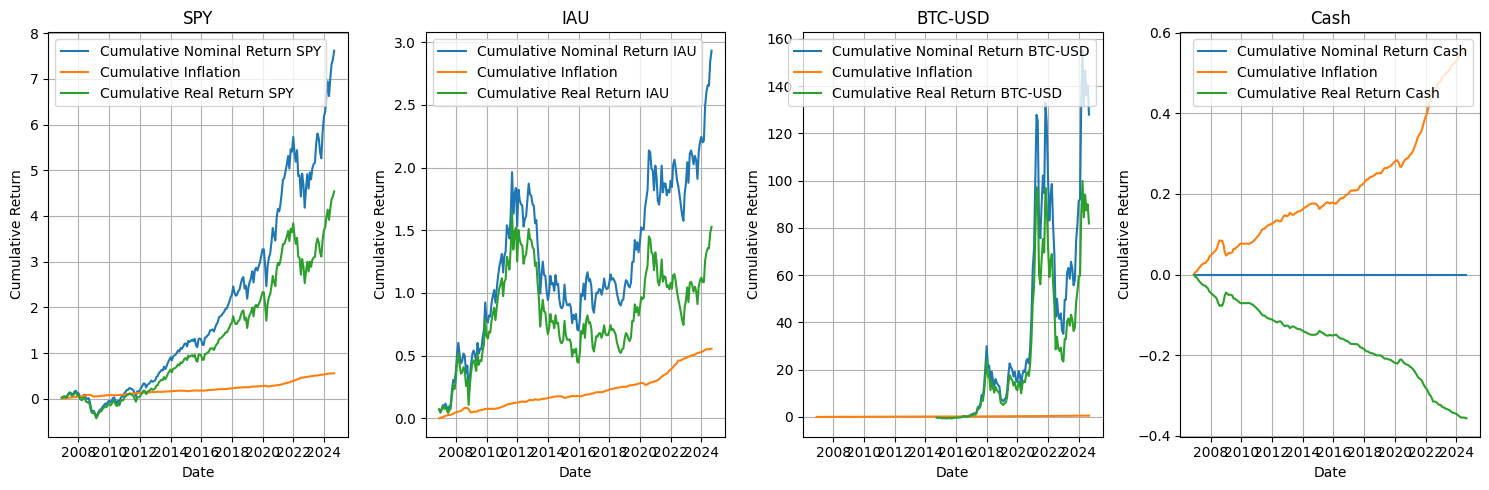

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=len(Tickers)+1, figsize=(15, 5))

for i, ticker in enumerate(Tickers):
  ax = axes[i]
  ax.plot(returns_df['DATE'], returns_df[f'CumulativeNominalReturn_{ticker}'], label=f'Cumulative Nominal Return {ticker}')
  ax.plot(returns_df['DATE'], returns_df['CumulativeInflation'], label='Cumulative Inflation')
  ax.plot(returns_df['DATE'], returns_df[f'CumulativeRealReturn_{ticker}'], label=f'Cumulative Real Return {ticker}')

  ax.set_title(f'{ticker}')
  ax.set_xlabel('Date')
  ax.set_ylabel('Cumulative Return')
  ax.legend()
  ax.grid(True)

ax = axes[-1]
ax.plot(returns_df['DATE'], returns_df['CumulativeNominalReturn_Cash'], label='Cumulative Nominal Return Cash')
ax.plot(returns_df['DATE'], returns_df['CumulativeInflation'], label='Cumulative Inflation')
ax.plot(returns_df['DATE'], returns_df['CumulativeRealReturn_Cash'], label='Cumulative Real Return Cash')

ax.set_title('Cash')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [220]:
# Value of an initial investment

initial_investment = 10000  # Example initial investment

# Step 2: Calculate cumulative inflation factor


returns_df['CumulativeInflation'] = (1 + merged_df['InflationRate']).cumprod()

# Step 3: Calculate the nominal and real value of the initial investment

for ticker in Tickers:
    returns_df[f'NominalValue_{ticker}'] = initial_investment * (1 + returns_df[f'CumulativeNominalReturn_{ticker}'])
    returns_df[f'RealValue_{ticker}'] = returns_df[f'NominalValue_{ticker}'] / returns_df['CumulativeInflation']


returns_df['NominalValue_Cash'] = initial_investment * (1 + returns_df['CumulativeNominalReturn_Cash'])
returns_df['RealValue_Cash'] = returns_df['NominalValue_Cash'] / returns_df['CumulativeInflation']


In [221]:
print(returns_df.head())

        DATE  CPIAUCSL       SPY       IAU  BTC-USD  InflationRate  \
1 2006-11-30   202.000  0.019885  0.071345      NaN       0.000495   
2 2006-12-31   203.100  0.021281 -0.018162      NaN       0.005446   
3 2007-01-31   203.437  0.015041  0.025296      NaN       0.001659   
4 2007-02-28   204.226 -0.019617  0.025135      NaN       0.003878   
5 2007-03-31   205.288  0.017203 -0.009777      NaN       0.005200   

   CumulativeInflation  CumulativeNominalReturn_SPY  CumulativeRealReturn_SPY  \
1             1.000495                     0.019885                  0.019380   
2             1.005944                     0.041590                  0.035436   
3             1.007613                     0.057256                  0.049268   
4             1.011521                     0.036515                  0.024710   
5             1.016781                     0.054347                  0.036946   

   CumulativeNominalReturn_IAU  ...  NominalValue_SPY  RealValue_SPY  \
1                   

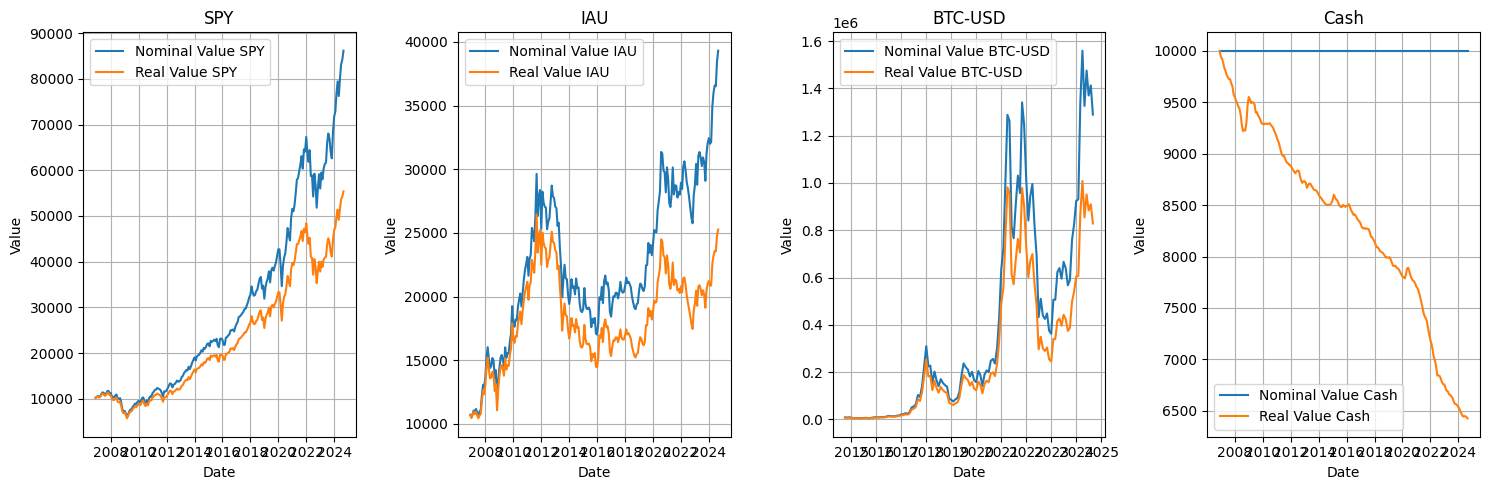

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=len(Tickers)+1, figsize=(15, 5))

for i, ticker in enumerate(Tickers):
  ax = axes[i]
  ax.plot(returns_df['DATE'], returns_df[f'NominalValue_{ticker}'], label=f'Nominal Value {ticker}')
  ax.plot(returns_df['DATE'], returns_df[f'RealValue_{ticker}'], label=f'Real Value {ticker}')


  ax.set_title(f'{ticker}')
  ax.set_xlabel('Date')
  ax.set_ylabel('Value')
  ax.legend()
  ax.grid(True)

ax = axes[-1]
ax.plot(returns_df['DATE'], returns_df['NominalValue_Cash'], label='Nominal Value Cash')
ax.plot(returns_df['DATE'], returns_df['RealValue_Cash'], label='Real Value Cash')

ax.set_title('Cash')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


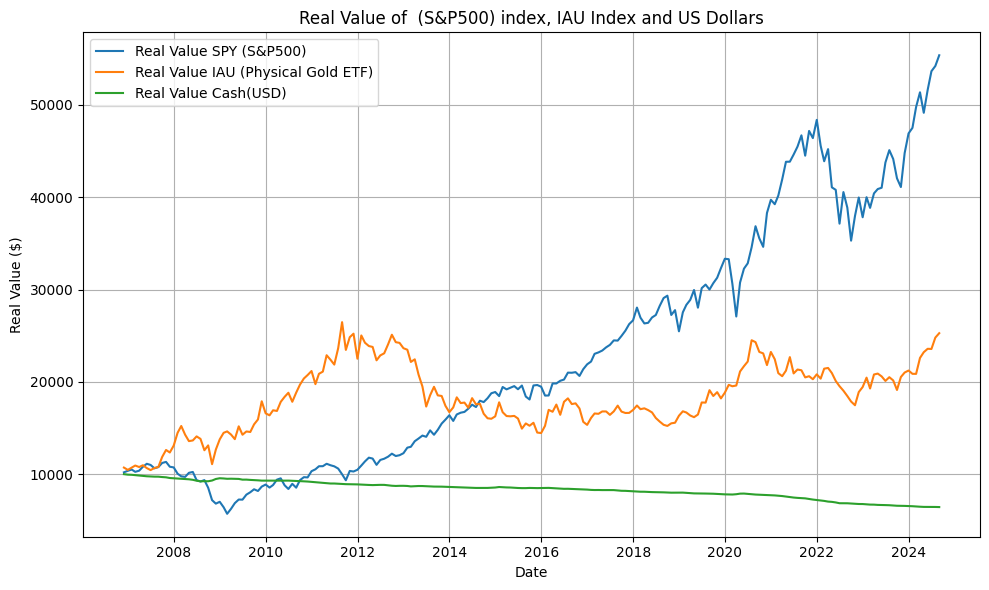

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(returns_df['DATE'], returns_df['RealValue_SPY'], label='Real Value SPY (S&P500)')
ax.plot(returns_df['DATE'], returns_df['RealValue_IAU'], label='Real Value IAU (Physical Gold ETF)')
#ax.plot(returns_df['DATE'], returns_df['RealValue_BTC-USD'], label='Real Value BTC-USD')
ax.plot(returns_df['DATE'], returns_df['RealValue_Cash'], label='Real Value Cash(USD)')

ax.set_title('Real Value of  (S&P500) index, IAU Index and US Dollars')
ax.set_xlabel('Date')
ax.set_ylabel('Real Value ($)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


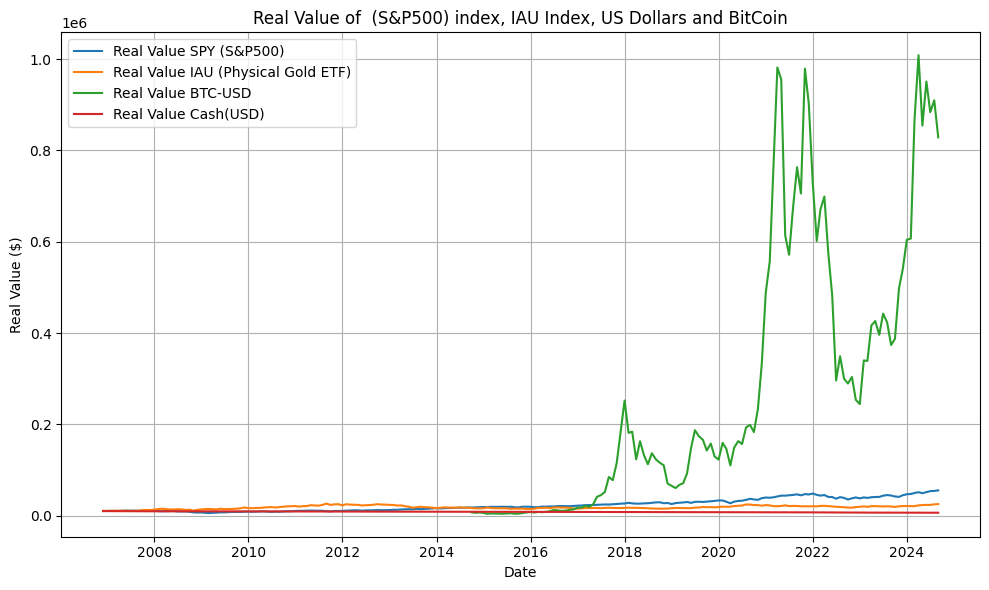

In [226]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(returns_df['DATE'], returns_df['RealValue_SPY'], label='Real Value SPY (S&P500)')
ax.plot(returns_df['DATE'], returns_df['RealValue_IAU'], label='Real Value IAU (Physical Gold ETF)')
ax.plot(returns_df['DATE'], returns_df['RealValue_BTC-USD'], label='Real Value BTC-USD')
ax.plot(returns_df['DATE'], returns_df['RealValue_Cash'], label='Real Value Cash(USD)')

ax.set_title('Real Value of  (S&P500) index, IAU Index, US Dollars and BitCoin')
ax.set_xlabel('Date')
ax.set_ylabel('Real Value ($)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()